In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# ! pip install pandas numpy scikit-learn seaborn matplotlib mlflow

In [5]:
# Load dataset
df = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')

In [6]:
# Basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


Shape: (5110, 12)
Columns: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed   

In [7]:
# Missing values
print("\nMissing values:\n", df.isnull().sum())




Missing values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
# Stroke rate
stroke_rate = df['stroke'].mean()
print(f"\nStroke rate in dataset: {stroke_rate:.2%}")




Stroke rate in dataset: 4.87%


In [9]:
# Data types and categorical values
print("\nData types:\n", df.dtypes)




Data types:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [10]:
# Unique values per categorical column
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")



gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


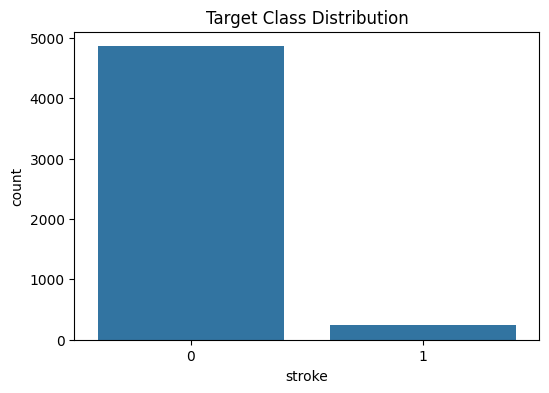

In [11]:
# Visuals
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='stroke')
plt.title('Target Class Distribution')
plt.show()



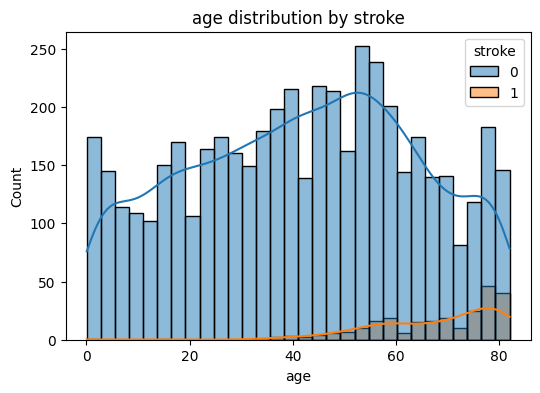

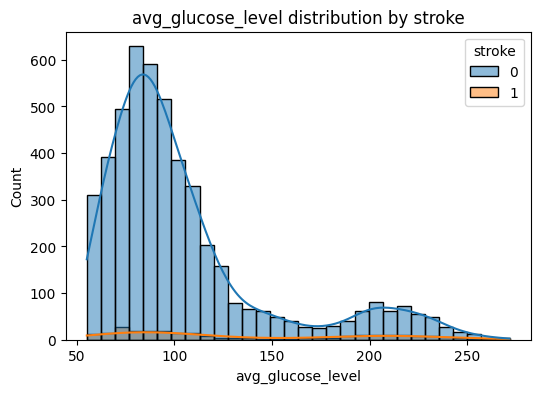

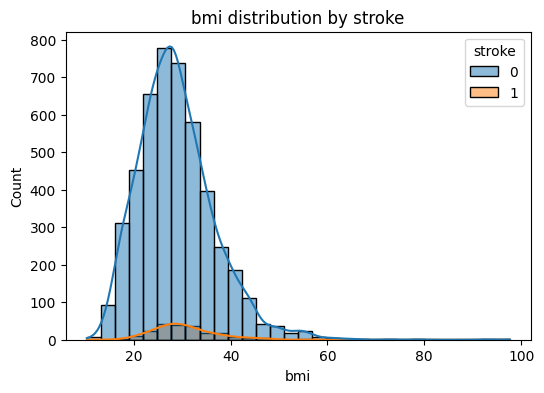

In [12]:
# Distribution of numeric features by stroke
numeric = ['age', 'avg_glucose_level', 'bmi']
for col in numeric:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='stroke', kde=True, bins=30)
    plt.title(f'{col} distribution by stroke')
    plt.show()



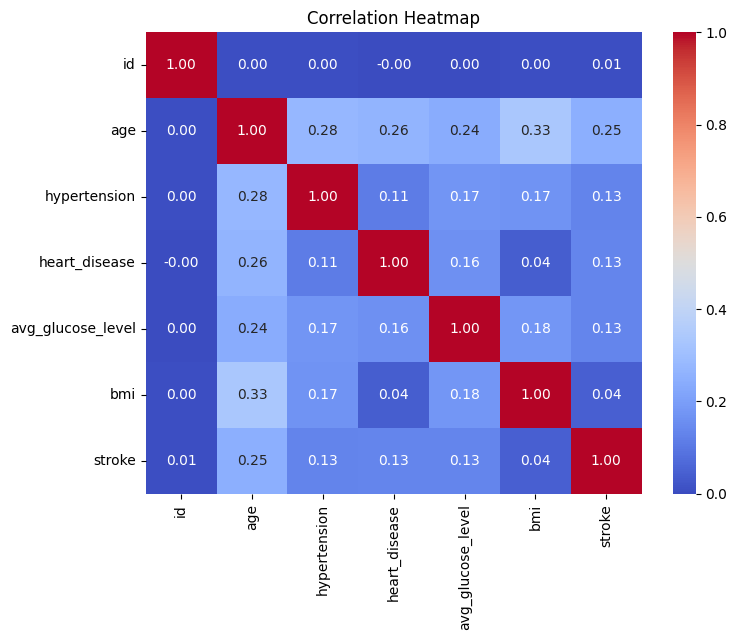

In [13]:
# Correlation heatmap
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()